## Adriel de Oliveira

    O usuário pode pegar suas variáveis de estado e espaço e aplicar na classe, de forma a resolver boa parte do problema de forma prática e fácil.

Exemplo de exercício que pode ser aplicado:

<img src="img\exemplo.png" alt="" width=600>

In [1]:
import numpy as np
import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *      # MATLAB-like functions
import control as ct
import time
import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
class MyControl():
    
    def __init__(self):
        self.variaveisEstado = 0
        self.K = 0 # Ganho K 
        self.sys = 0  # Sistema principal.
        self.controlSys = 0 # Sistema colocado para fazer o controle do principal.
        self.serie = 0 # Colocados em série.
        self.feed = 0 # Processo final, já adicionado o feedback.
        # Escolher criar o sistema pela função de transferêmcia ou pelas variavéis de estado:
        self.A = 0
        self.B = 0
        self.C = 0
    
    # Criar sistema à partir da função de transferência.
    def criarSistemaTransf(self):
        num = []
        den = []
        nNum = int(input("Quantos coeficiente tem o numerador? ",))
        nDen = int(input("Quantos coeficiente tem o denominador? ",))
        print("Para ordens nos quais os coeficientes são zero, informe zero!")
        for x in range(0,nNum):
            x = float(input("Informe, na ordem certa, os coeficientes do numerador: ",))
            num.append(x)
        num = np.array(num)
        for x in range(0,nDen):
            x = float(input("Informe, na ordem certa, os coeficientes do denominador: ",))
            den.append(x)
        den = np.array(den)
        self.sys = ct.tf([[num]], [[den]])
        print(self.sys)
        
    # Criar sistema à partir das equações de estado.   
    def criarSistemaEstado(self):
        # Cria as matrizes de estado. Respeitar a ordem dos inputs de acordo com a matriz de referência.
        self.variaveisEstado = int(input("São quantas varivéis de estado? ",))
        
        # Matriz de estado A 
        listA = [] 
        for x in range(0,int(self.variaveisEstado*self.variaveisEstado)):
            x = int(input("Informe, na ordem certa, os valores da matriz de estado: ",))
            listA.append(x)
        self.A = np.array(listA, dtype = float)
        self.A.resize(self.variaveisEstado,self.variaveisEstado)
        self.A = self.A.tolist()
        print("Matriz de estado: \n",self.A)

        # Matriz de entrada B
        listB = []
        for x in range(0,int(self.variaveisEstado)):
            x = int(input("Informe, na ordem certa, os valores da matriz de entrada: ",))
            listB.append(x)
        self.B = np.array(listB, dtype = float)
        self.B.resize(self.variaveisEstado,1)
        self.B = self.B.tolist()
        print("Matriz de entrada: \n",self.B)

        # Matriz de saída C
        listC = []
        for x in range(0,int(self.variaveisEstado)):
            x = int(input("Informe, na ordem certa, os valores da matriz de saída: ",))
            listC.append(x)
        self.C = np.array(listC, dtype = float)
        self.C.resize(1,self.variaveisEstado)
        self.C = self.C.tolist()
        print("Matriz de saída C: \n",self.C)
        self.sys = StateSpace(self.A, self.B, self.C, 0)
        print(self.sys)
        self.sys = ct.tf(self.sys)
        print(self.sys)
        
    # Metódo para análise gráfica da reposta natural            
    def analiseIsolada(self):    
        print("Plot da funçaõ de transferência: \n")
        time.sleep(0.5)
        plt.figure(1)
        fig, ax = plt.subplots()
        yout, T = impulse(self.sys)
        plt.plot(T.T, yout.T)
        ax.set_title("Resposta Natural")
        ax.set_ylabel('volts')
        ax.set_xlabel('tempo(s)')
        plt.show(block=False)
        time.sleep(1)
        
        # Polos e zeros.
        #print("Polos e zeros: \n")
        time.sleep(0.5)
        #damp(self.sys)
        #pzmap(self.sys)
        time.sleep(1)
        
        # Root-Locus (Lugar das raízes)
        print("Lugar das raízes: \n")
        time.sleep(1)
        rlocus(self.sys)
      
    # Realimentação para a resposta natural.
    def feedBackSimples(self):
        self.feed = ct.feedback(self.sys, sys2=1, sign= 1)
        print("Função de transferência com realimentação: \n")
        print(self.feed)
        time.sleep(2)
        print("Plot com realimentação: \n")
        time.sleep(1)
        plt.figure(2)
        fig, ax = plt.subplots()
        youf, T = impulse(self.feed)
        plt.plot(T, youf.T)
        ax.set_title("Realimentação")
        ax.set_ylabel('volts')
        ax.set_xlabel('tempo(s)')
        plt.show()
        time.sleep(2)
        #print("Polos e zeros: \n")
        time.sleep(1)
        #damp(self.feed)
        #pzmap(self.feed)
        time.sleep(1)

        print("Lugar das raízes com realimentação: \n")
        ct.rlocus(self.feed)

    # Adiciona um novo sistema, que serve para fazer o controle. No caso de estudo será uma resposta degrau    
    def sistemaControle(self): 
        num = []
        den = []
        nNum = int(input("Quantos coeficiente tem o numerador? ",))
        nDen = int(input("Quantos coeficiente tem o denominador? ",))
        print("Para ordens nos quais os coeficientes são zero, informe zero!")
        for x in range(0,nNum):
            x = float(input("Informe, na ordem certa, os coeficientes do numerador: ",))
            num.append(x)
        num = np.array(num)
        for x in range(0,nDen):
            x = float(input("Informe, na ordem certa, os coeficientes do denominador: ",))
            den.append(x)
        den = np.array(den)
        self.controlSys = ct.tf([[num]], [[den]])
        print(self.controlSys)
       
    # Análise desse sistema junto à resposta natural
    def emSerie(self):
        self.serie = ct.series(self.controlSys,self.sys)
        print(self.serie)
        print("Plot em série: \n")
        time.sleep(1)
        plt.figure(3)
        fig, ax = plt.subplots()
        yout, T = impulse(self.serie)
        plt.plot(T.T, yout.T)
        ax.set_xlabel('tempo(s)')
        ax.set_ylabel('volts')
        ax.set_title('Resposta Degrau')
        plt.show(block=False)
        time.sleep(1)
        print("Polos e zeros: ")
        time.sleep(1)
        #damp(self.serie)
        #pzmap(self.serie)
        time.sleep(1) 
        print("O esperado é que em 'Open-loop' os ganhos não alterem no lugar das raízes.")
        time.sleep(1)
        ct.rlocus(self.serie)
            
    def emSerieComFeedBack(self): 
        self.feed = ct.feedback(self.serie, sys2=1, sign= 1)
        print(self.feed)
        print("Plot em série e com realimentação: \n")
        time.sleep(1)
        plt.figure(1)
        fig, ax = plt.subplots()
        yout, T = impulse(self.feed)
        plt.plot(T.T, yout.T)
        ax.set_xlabel('tempo(s)')
        ax.set_ylabel('volts')
        ax.set_title('Resposta com Realimentação')
        plt.show(block=False)
        time.sleep(1)
        #print("Polos e zeros: \n")
        #damp(self.feed)
        #pzmap(self.feed)
        time.sleep(1)
        print("O esperado é que em 'Closed-loop' os ganhos alterem no lugar das raízes.")
        ct.rlocus(self.feed)
        

## Analisando sistema principal isoladamente:

In [3]:
controle = MyControl()

In [4]:
controle.criarSistemaTransf() # Opção 1

Quantos coeficiente tem o numerador? 2
Quantos coeficiente tem o denominador? 3
Para ordens nos quais os coeficientes são zero, informe zero!
Informe, na ordem certa, os coeficientes do numerador: 1
Informe, na ordem certa, os coeficientes do numerador: 1
Informe, na ordem certa, os coeficientes do denominador: 1
Informe, na ordem certa, os coeficientes do denominador: 4
Informe, na ordem certa, os coeficientes do denominador: 2

    s + 1
-------------
s^2 + 4 s + 2



In [4]:
controle.criarSistemaEstado() # Opção 2

São quantas varivéis de estado? 2
Informe, na ordem certa, os valores da matriz de estado: 1
Informe, na ordem certa, os valores da matriz de estado: 0
Informe, na ordem certa, os valores da matriz de estado: -40
Informe, na ordem certa, os valores da matriz de estado: -24
Matriz de estado: 
 [[1.0, 0.0], [-40.0, -24.0]]
Informe, na ordem certa, os valores da matriz de entrada: 0
Informe, na ordem certa, os valores da matriz de entrada: 4
Matriz de entrada: 
 [[0.0], [4.0]]
Informe, na ordem certa, os valores da matriz de saída: -10
Informe, na ordem certa, os valores da matriz de saída: -6
Matriz de saída C: 
 [[-10.0, -6.0]]
A = [[  1.   0.]
     [-40. -24.]]

B = [[0.]
     [4.]]

C = [[-10.  -6.]]

D = [[0.]]


  -24 s + 24
---------------
s^2 + 23 s - 24



Plot da funçaõ de transferência: 



<Figure size 432x288 with 0 Axes>

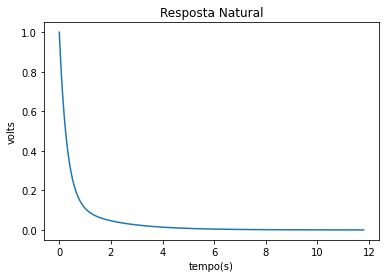

Lugar das raízes: 



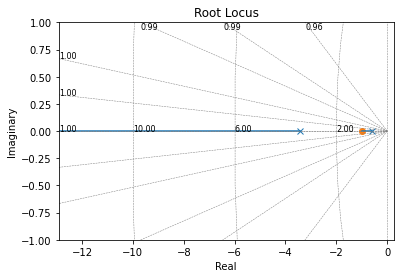

In [5]:
controle.analiseIsolada()

Função de transferência com realimentação: 


    s + 1
-------------
s^2 + 3 s + 1

Plot com realimentação: 



<Figure size 432x288 with 0 Axes>

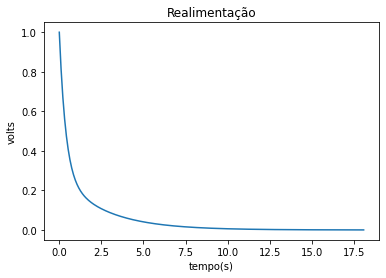

Lugar das raízes com realimentação: 



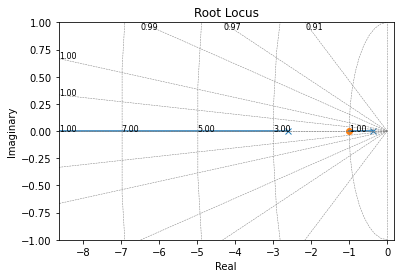

In [9]:
controle.feedBackSimples()

## Analisando sistema com adição de um outro sistema

Aqui pode-se adicionar uma entrada 1/s ou um qualquer outro sistema que é usado para fazer o controle. Feito isso, seguindo a lógica do algorítimo, adiciona-se a realimentação para que seja feita a análise de lugar das raízes na qual avaliamos a estabilidade do sistema dado um ganho K.

In [6]:
controle.sistemaControle()

Quantos coeficiente tem o numerador? 1
Quantos coeficiente tem o denominador? 2
Para ordens nos quais os coeficientes são zero, informe zero!
Informe, na ordem certa, os coeficientes do numerador: 1
Informe, na ordem certa, os coeficientes do denominador: 1
Informe, na ordem certa, os coeficientes do denominador: 0

1
-
s




      s + 1
-----------------
s^3 + 4 s^2 + 2 s

Plot em série: 



<Figure size 432x288 with 0 Axes>

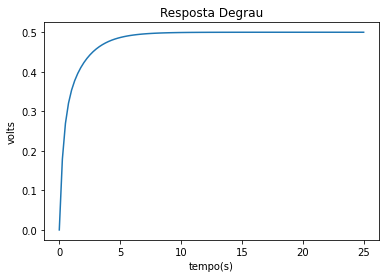

Polos e zeros: 
O esperado é que em 'Open-loop' os ganhos não alterem no lugar das raízes.


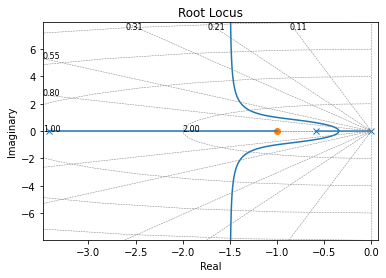

In [7]:
controle.emSerie()


       s + 1
-------------------
s^3 + 4 s^2 + s - 1

Plot em série e com realimentação: 



<Figure size 432x288 with 0 Axes>

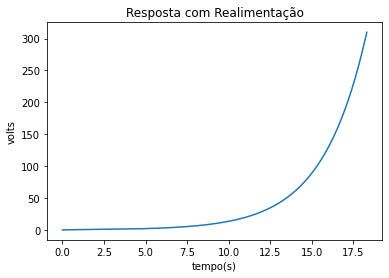

O esperado é que em 'Closed-loop' os ganhos alterem no lugar das raízes.


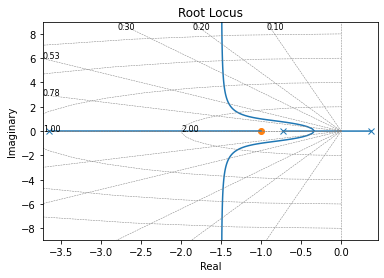

In [8]:
controle.emSerieComFeedBack()

### Metodologia?
    O presente código tem a finalidade de fazer a análise de um sistema de controle de segunda ordem qualquer de forma prática, utilizando-se da linguagem de programação python e tendo como principal referência a biblioteca control, além de outras bibliotecas que são fundamentais para qualquer análise matemática, como Numpy e Matplotlib. 
    Inicialmente o usuário pode optar por fazer a análise usando dois métodos: criarSistemaTransf() e criarSistemaEstado(). O primeiro permite já iniciar o estudo usando a função de transferência pronta (no formato 1/s^2...) enquanto o segundo permite entrar com as equações de estado (matrizes de estado, entrada e saída) para que assim seja criada a função de transferência para o usuário.
    Uma vez criado as funções é possível fazer as seguintes análises deste sistema de segunda ordem:
        - Usar o método analiseIsolada() para ver o gráfico do comportamento do sistema como resposta natural.
        - Aplicar uma realimentação à resposta natural com o método feedBackSimples()
        - Criar e aplicar um outro sistema à resposta natural com os metodos sistemaControle() e emSerie() respectivamente.
        - Aplciar um feedback à esse conjunto com o método emSerieComFeedBack()
    Dessa forma, é possível fazer de forma prática as principais análises do sistema e ter uma ideia básica do que está acontecendo com o sistema.
    
### Aplicando:
    Tomando um circuito RLC genérico e fazendo a analisando a função de transferência de tensão no indutor (VL(s)/V(s)):
    Assumiremos os valores:
    V(t) = u(t)
    R = 6 Ohms
    L = 0.25H
    C = 0.1F
    Utilizando o método criarSistemaEstado() temos o resultado:
    (Ver no código)
    Fazendo a análise com analiseIsolada() obtem-se o gráfico da resposta natural começando em uma tensão negativa e estabilizando em 0.
    Agora pode-se criar uma resposta degrau com o método sistemaControle() e adicioná-lo ao sistema RLC com o método emSerie(), onde obtem-se um gráfico da resposta degrau de um sistema.
    (Gráfico)
    Neste exemplo em específico não se fez necessário fazer a aplicação dos outros método de análise, como o emSerieComFeedBack(), que caso o sistema fosse subamortecido, ele ajudaria esse sistema a estabilizar  de forma mais rápida.
    